In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import yfinance as yf
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR

#Ejercicio 1

## a. Grafico de la mixtura

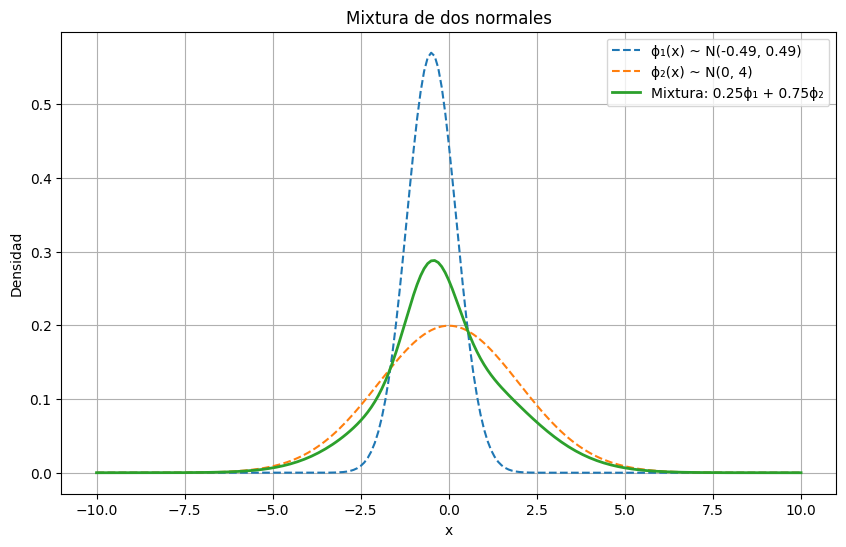

In [ ]:
# Paso 1: definimos los parámetros de las normales
mu1, sigma1 = -0.49, np.sqrt(0.49)     # N(-0.49, 0.49)
mu2, sigma2 = 0, np.sqrt(4)     # N(0, 4)
w1, w2 = 0.25, 0.75

# Paso 2: definimos el soporte
x = np.arange(-10, 10.1, 0.1)

# Paso 3: calculamos las densidades individuales
phi1 = norm.pdf(x, loc=mu1, scale=sigma1)
phi2 = norm.pdf(x, loc=mu2, scale=sigma2)

# Paso 4: combinamos con los pesos
mixtura = w1 * phi1 + w2 * phi2

# Paso 5: graficamos
plt.figure(figsize=(10, 6))
plt.plot(x, phi1, label='ϕ₁(x) ~ N(-0.49, 0.49)', linestyle='--')
plt.plot(x, phi2, label='ϕ₂(x) ~ N(0, 4)', linestyle='--')
plt.plot(x, mixtura, label='Mixtura: 0.25ϕ₁ + 0.75ϕ₂', linewidth=2)
plt.title('Mixtura de dos normales')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

##b.

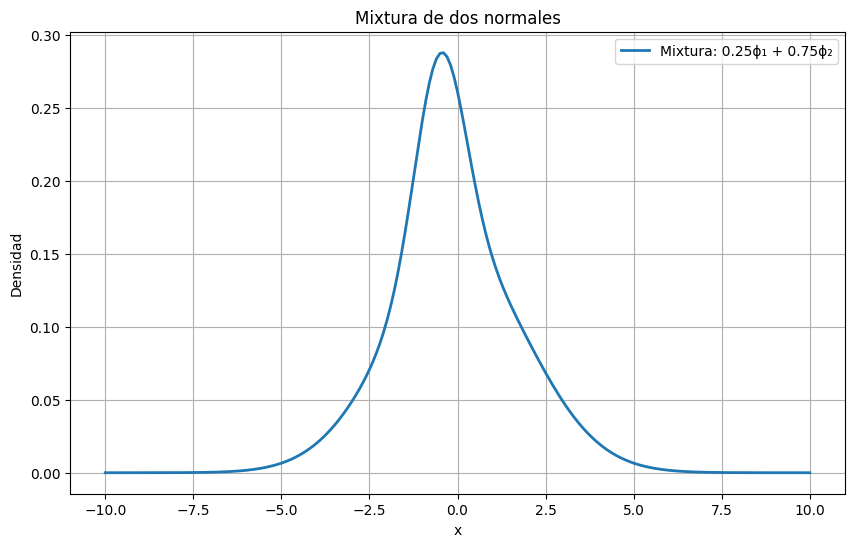

In [ ]:
#Grafico solo la mixtura para poder observarla mejor
plt.figure(figsize=(10, 6))
plt.plot(x, mixtura, label='Mixtura: 0.25ϕ₁ + 0.75ϕ₂', linewidth=2)
plt.title('Mixtura de dos normales')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

Observando el grafico de la mixtura, es dificil asegurarlo, pero parece presentar una leve asimetría positiva, ya que parece tener la cola derecha un poco mas pesada, pero para estar seguro hay que calcular el coeficiente de asimetría.

##c. Media, varianza, asimetría y curtosis

### Momentos de una mezcla de dos normales

Sea  
$$
X \sim w_1\,\mathcal N(\mu_1,\sigma_1^2) + w_2\,\mathcal N(\mu_2,\sigma_2^2),
\quad w_1+w_2=1
$$  
con $\mu=\mathbb E[X]$.

---

#### 1) Media
$$
\mu = w_1\mu_1 + w_2\mu_2
$$

---

#### 2) Varianza
$$
\operatorname{Var}(X) = w_1(\sigma_1^2+(\mu_1-\mu)^2) + w_2(\sigma_2^2+(\mu_2-\mu)^2)
$$

---

#### 3) Tercer momento central y asimetría
- **Momento central de orden 3:**
$$
\mu_3 = w_1\big((\mu_1-\mu)^3 + 3(\mu_1-\mu)\sigma_1^2\big) +
       w_2\big((\mu_2-\mu)^3 + 3(\mu_2-\mu)\sigma_2^2\big)
$$

- **Asimetría (skewness):**
$$
\gamma_1 = \frac{\mu_3}{\big(\operatorname{Var}(X)\big)^{3/2}}
$$

---

#### 4) Cuarto momento central y curtosis
- **Momento central de orden 4:**
$$
\mu_4 = w_1\big((\mu_1-\mu)^4 + 6(\mu_1-\mu)^2\sigma_1^2 + 3\sigma_1^4\big) +
       w_2\big((\mu_2-\mu)^4 + 6(\mu_2-\mu)^2\sigma_2^2 + 3\sigma_2^4\big)
$$

- **Curtosis (no-excesiva):**
$$
\kappa = \frac{\mu_4}{\big(\operatorname{Var}(X)\big)^2}
$$

- **Exceso de curtosis:**
$$
\kappa - 3
$$

In [ ]:
# Paso 1: calculamos la media
mu_mix = w1 * mu1 + w2 * mu2

# Paso 2: calculamos la varianza
var_mix = w1 * (sigma1**2 + (mu1 - mu_mix)**2) + w2 * (sigma2**2 + (mu2 - mu_mix)**2)

# Paso 3: tercer momento central (para skewness)
mu3_mix = w1 * ((mu1 - mu_mix)**3 + 3 * (mu1 - mu_mix) * sigma1**2) + \
          w2 * ((mu2 - mu_mix)**3 + 3 * (mu2 - mu_mix) * sigma2**2)

skew_mix = mu3_mix / (var_mix**1.5)

# Paso 4: cuarto momento central (para kurtosis)
mu4_mix = w1 * ((mu1 - mu_mix)**4 + 6 * (mu1 - mu_mix)**2 * sigma1**2 + 3 * sigma1**4) + \
          w2 * ((mu2 - mu_mix)**4 + 6 * (mu2 - mu_mix)**2 * sigma2**2 + 3 * sigma2**4)

kurt_mix = mu4_mix / (var_mix**2)

# Paso 6: mostrar resultados
print("Media:", mu_mix)
print("Varianza:", var_mix)
print("Asimetría:", skew_mix)
print("Curtosis:", kurt_mix)

Media: -0.1225
Varianza: 3.16751875
Asimetría: 0.16965521118657623
Curtosis: 3.64333151439453


La media es -0.1225, que tiene sentido ya que en el grafico se ve que el gráfico está corrido hacia la izquierda del 0, y además la mixtura es de dos normales, una con media 0 y la otra con media negativa, por lo que la media de la mixtura necesariamente va a ser negativa.

La varianza de la mixtura también tiene sentido, y está entre las varianzas de las dos mixturas, más cerca de la $X_2$, ya que tiene más peso en la mixtura.

Comprobamos como vimos anteriormente en el gráfico que la asimetría es positiva, ya que tiene la cola derecha más pesada.

La curtosis es de 3.64, por lo que la mixtura es leptocúrtica, y tiene las colas más pesadas que una normal estándar con los mismos parámetros (una normal estándar tiene una curtosis de 3, por lo que tiene 0.64 de curtosis en exceso).

##d. Leptocurtosis

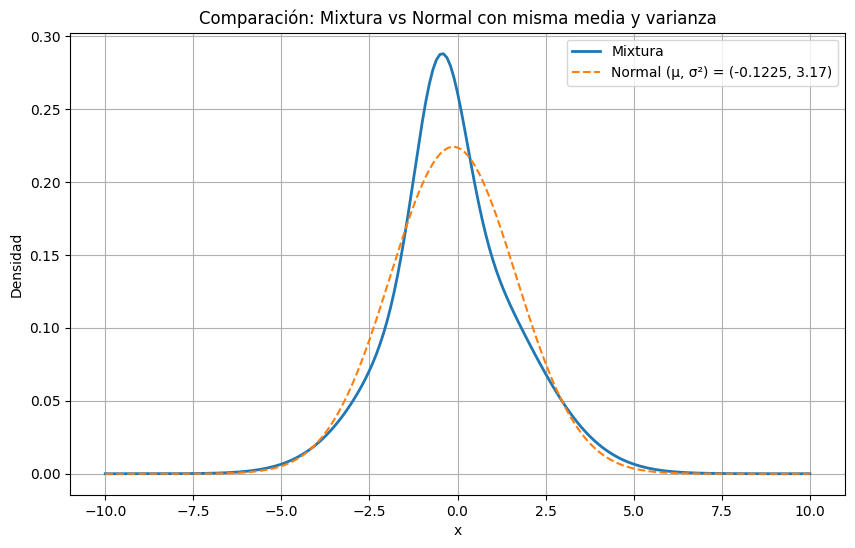

In [ ]:
# pdf de la normal con misma media y varianza
normal_comp = norm.pdf(x, loc=mu_mix, scale=np.sqrt(var_mix))

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, mixtura, label='Mixtura', linewidth=2)
plt.plot(x, normal_comp, label='Normal (μ, σ²) = ({}, {})'.format(mu_mix, round(var_mix, 2)), linestyle='--')
plt.title('Comparación: Mixtura vs Normal con misma media y varianza')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

Como mencionamos en el inciso anterior, la mixtura tiene curtosis en exceso de 0.64, y esto se ve en el gráfico ya que la mixtura muestra colas mas pesadas que una normal estándar con los mismos parametros de media y varianza

##e. QQ Plot

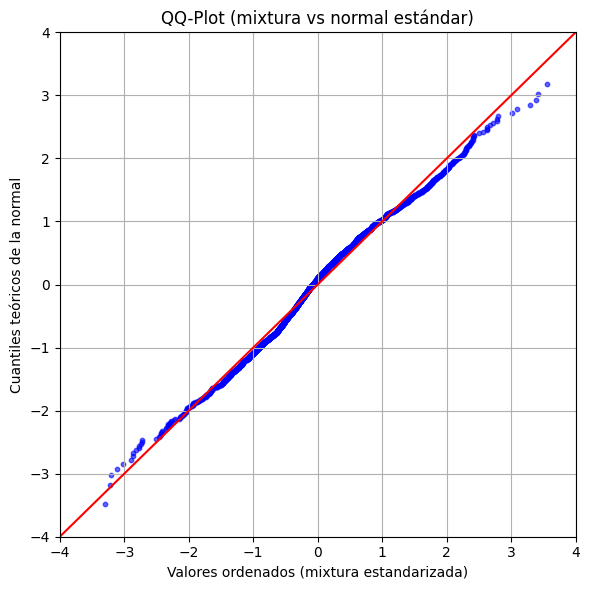

In [ ]:
# Paso 1: generamos una muestra de la mixtura
n = 2000
np.random.seed(42)  # para reproducibilidad

# Generamos n elecciones según los pesos
componentes = np.random.choice([0, 1], size=n, p=[w1, w2])

# Inicializamos la muestra
muestra_mixtura = np.zeros(n)

# Generamos valores según cada componente
muestra_mixtura[componentes == 0] = np.random.normal(mu1, sigma1, size=(componentes == 0).sum())
muestra_mixtura[componentes == 1] = np.random.normal(mu2, sigma2, size=(componentes == 1).sum())

# Paso 2: estandarizamos la muestra
media_m = muestra_mixtura.mean()
std_m = muestra_mixtura.std(ddof=1)
muestra_std = (muestra_mixtura - media_m) / std_m

# Paso 3: obtenemos cuantiles teóricos de la normal estándar y datos ordenados
muestra_ordenada = np.sort(muestra_std)
cuantiles_teoricos = norm.ppf((np.arange(1, n+1) - 0.5) / n)

# Paso 4: QQ-plot
plt.figure(figsize=(6, 6))
plt.scatter(muestra_ordenada, cuantiles_teoricos, color='blue', s=10, alpha=0.6)
plt.plot([-5, 5], [-5, 5], color='red')  # Línea 45 grados
plt.xlabel("Valores ordenados (mixtura estandarizada)")
plt.ylabel("Cuantiles teóricos de la normal")
plt.title("QQ-Plot (mixtura vs normal estándar)")
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.tight_layout()
plt.show()

El QQ Plot es consistente con los valores que observamos de curtosis y asimetría, ya que en la cola derecha, los valores tienden a irse por abajo de la normal estándar, siguiendo este gráfico teórico visto en clase de asimetría positiva y leptocurtosis.

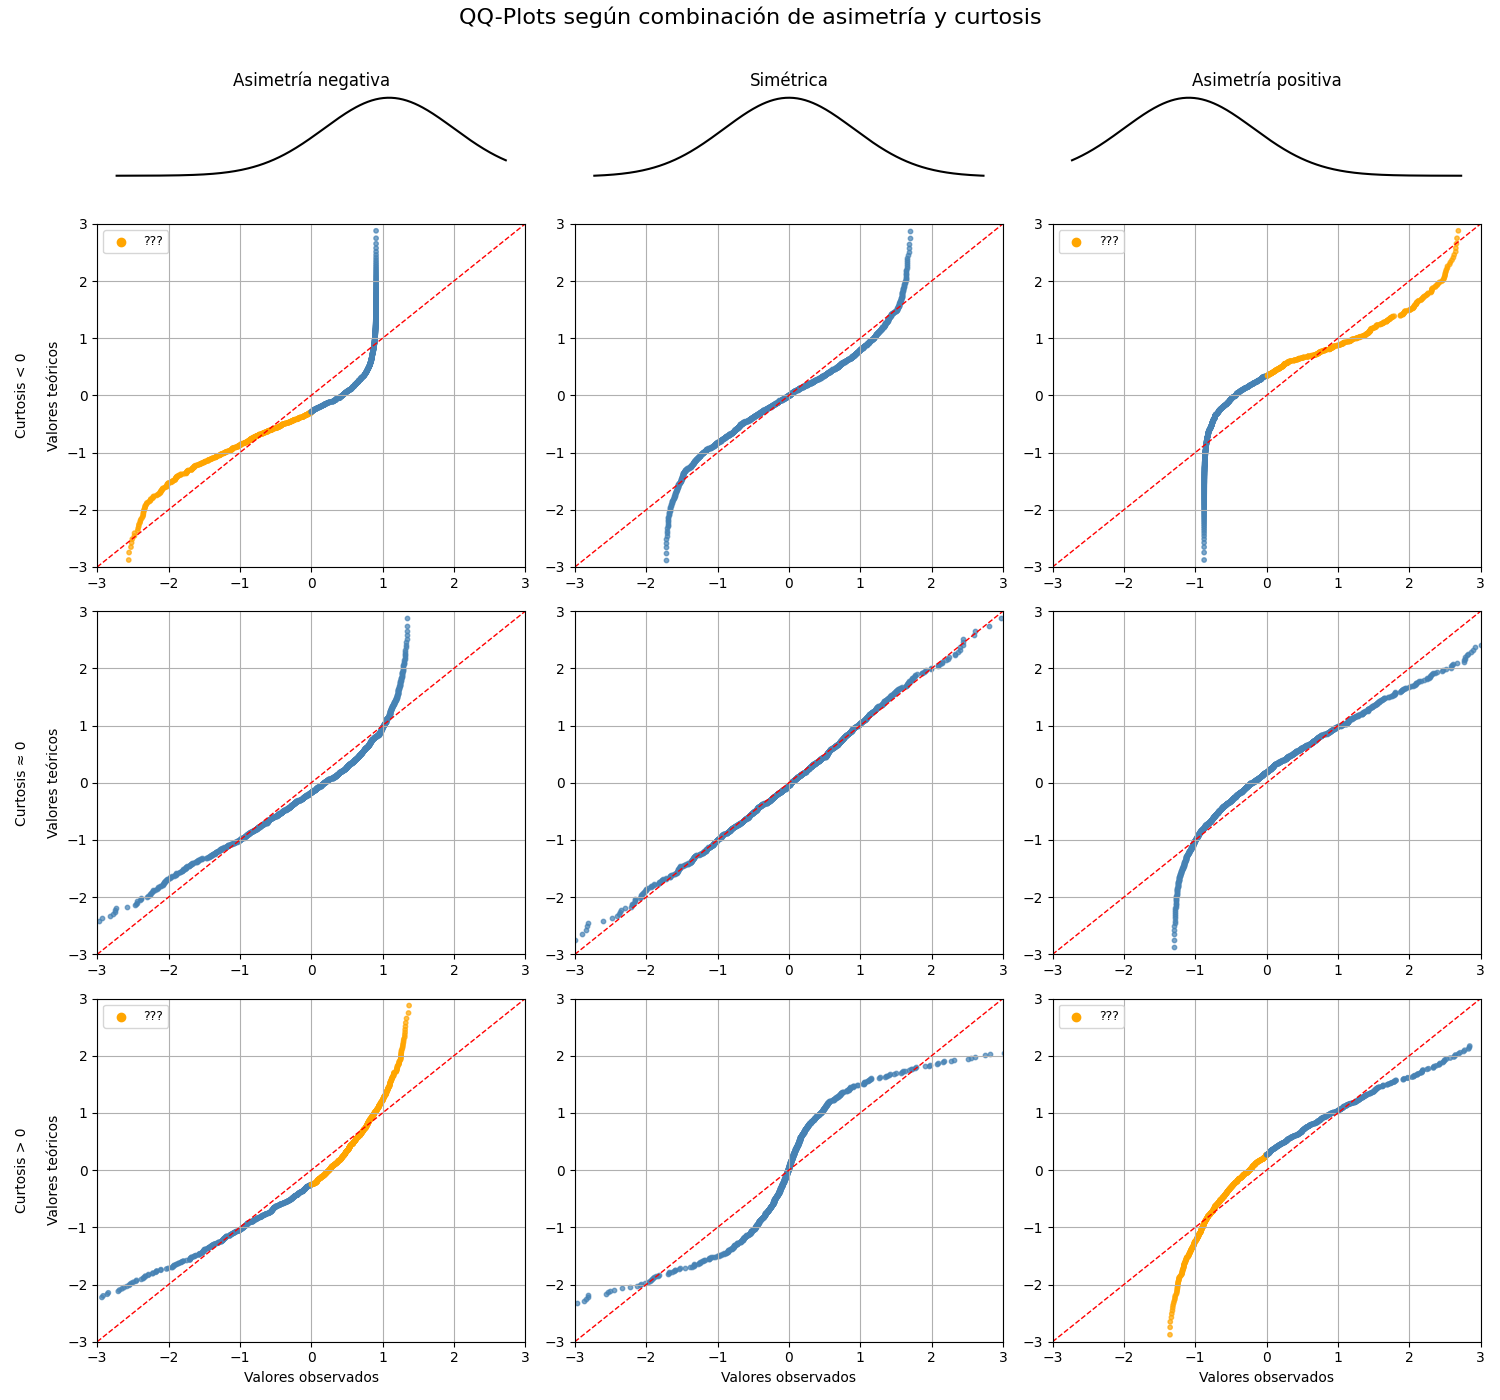

#Ejercicio 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/MIA103_Final_Ejer_2_250823.dta'

df = pd.read_stata(ruta)

df.head()

,RBER_AR,RBER_AR_sd6,t
0,98.870003,1.225477,2010-01-01
1,100.620003,1.976474,2010-02-01
2,99.820000,2.138749,2010-03-01
3,99.349998,1.786254,2010-04-01
4,102.059998,1.618118,2010-05-01


##a. Gráfico de las series de tiempo

In [ ]:
# Asegurar que sea datetime
df['t'] = pd.to_datetime(df['t'])

df.columns = df.columns.str.strip() #Para sacarle espacios a los nombres de las variables

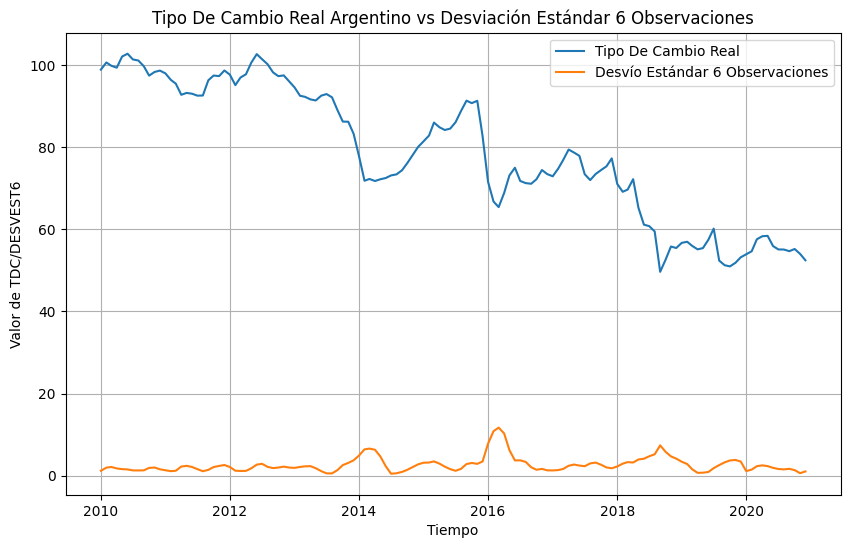

In [ ]:
# Defino eje X y series a graficar
eje_x = df['t']
serie_tdc = df['RBER_AR']
serie_desvest_tdc = df['RBER_AR_sd6']

# Grafico las series en función del tiempo
plt.figure(figsize = (10, 6))
plt.plot(eje_x , serie_tdc, label = 'Tipo De Cambio Real')
plt.plot(eje_x , serie_desvest_tdc, label = 'Desvío Estándar 6 Observaciones')
plt.title('Tipo De Cambio Real Argentino vs Desviación Estándar 6 Observaciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor de TDC/DESVEST6')
plt.grid(True)
plt.legend()
plt.show()

##b. Orden de integración

### Tipo de cambio real

In [ ]:
#Verifico que no tenga NAN y sea numerico
tc_real = pd.to_numeric(df['RBER_AR'], errors='coerce').dropna()
tc_real.head(), tc_real.shape

(0     98.870003
 1    100.620003
 2     99.820000
 3     99.349998
 4    102.059998
 Name: RBER_AR, dtype: float32,
 (132,))

In [ ]:
#ADF en niveles

res0 = adfuller(tc_real, regression='c', autolag='AIC')
print(f"ADF nivel (c): stat={res0[0]:.3f}, p={res0[1]:.4f}, lags={res0[2]}, nobs={res0[3]}")
for k, v in res0[4].items():
    print(f"crit {k}: {v:.3f}")

ADF nivel (c): stat=-0.897, p=0.7888, lags=2, nobs=129
crit 1%: -3.482
crit 5%: -2.884
crit 10%: -2.579


Como el PVALOR es 0.79, no rechazo la hipotesis nula, por lo que la serie no es estacionaria

In [ ]:
#Probamos con tendencia deterministica

res0_ct = adfuller(tc_real, regression='ct', autolag='AIC')
print(f"ADF nivel (ct): stat={res0_ct[0]:.3f}, p={res0_ct[1]:.4f}")

ADF nivel (ct): stat=-3.704, p=0.0221


La serie parece tener una tendencia determinística, ya que se rechaza la hipotesis nula a un nivel de 5%, por lo que el tipo de cambio real es I(0), pero con tendencia determinística

###Desvío estandar del tipo de cambio real

In [ ]:
#Verifico que no tenga NAN y sea numerico
ds_tc_real = pd.to_numeric(df['RBER_AR_sd6'], errors='coerce').dropna()
ds_tc_real.head(), ds_tc_real.shape

(0    1.225477
 1    1.976474
 2    2.138749
 3    1.786254
 4    1.618118
 Name: RBER_AR_sd6, dtype: float64,
 (132,))

In [ ]:
#ADF en niveles

res0 = adfuller(ds_tc_real, regression='c', autolag='AIC')
print(f"ADF nivel (c): stat={res0[0]:.3f}, p={res0[1]:.4f}, lags={res0[2]}, nobs={res0[3]}")
for k, v in res0[4].items():
    print(f"crit {k}: {v:.3f}")

ADF nivel (c): stat=-4.276, p=0.0005, lags=2, nobs=129
crit 1%: -3.482
crit 5%: -2.884
crit 10%: -2.579


Como el pvalor es 0.0005, puedo rechazar la hipótesis nula, y concluir que la serie es estacionaria en niveles por lo que es I(0)

##c. Modelo VAR

Primero tengo que eliminar la tendencia determíistica, por lo que tengo que correr una regresion del tipo de cambio real contra el tiempo, para luego poder restarle el $dt$ estimado a la variable

In [ ]:
# Convertir la columna 't' a una representación numérica (número de períodos desde el inicio en meses)
df['t_numeric'] = (df['t'] - df['t'].min()).dt.days

trend = sm.OLS(df["RBER_AR"], sm.add_constant(df[["t_numeric"]])).fit()

# Mostramos resultados
print("Regresion tipo de cambio real contra el tiempo")
print(trend.summary())

Regresion tipo de cambio real contra el tiempo
                            OLS Regression Results                            
Dep. Variable:                RBER_AR   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     857.5
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           4.31e-59
Time:                        22:55:50   Log-Likelihood:                -421.63
No. Observations:                 132   AIC:                             847.3
Df Residuals:                     130   BIC:                             853.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

Como vemos en la regresión, el tiempo tiene una tendencia negativa, de -0.0131 sobre el tipo de cambio real. Para eliminar la tendendia, necesitamos hacer:
$$Y_t - (-0.0131)t$$

In [ ]:
df.head()

,RBER_AR,RBER_AR_sd6,t,t_numeric
0,98.870003,1.225477,2010-01-01,0
1,100.620003,1.976474,2010-02-01,31
2,99.820000,2.138749,2010-03-01,59
3,99.349998,1.786254,2010-04-01,90
4,102.059998,1.618118,2010-05-01,120


In [ ]:
df["RBER_AR_DETREND"] = df["RBER_AR"] + (0.0131) * df["t_numeric"]

df.head()

,RBER_AR,RBER_AR_sd6,t,t_numeric,RBER_AR_DETREND
0,98.870003,1.225477,2010-01-01,0,98.870003
1,100.620003,1.976474,2010-02-01,31,101.026103
2,99.820000,2.138749,2010-03-01,59,100.592900
3,99.349998,1.786254,2010-04-01,90,100.528998
4,102.059998,1.618118,2010-05-01,120,103.631998


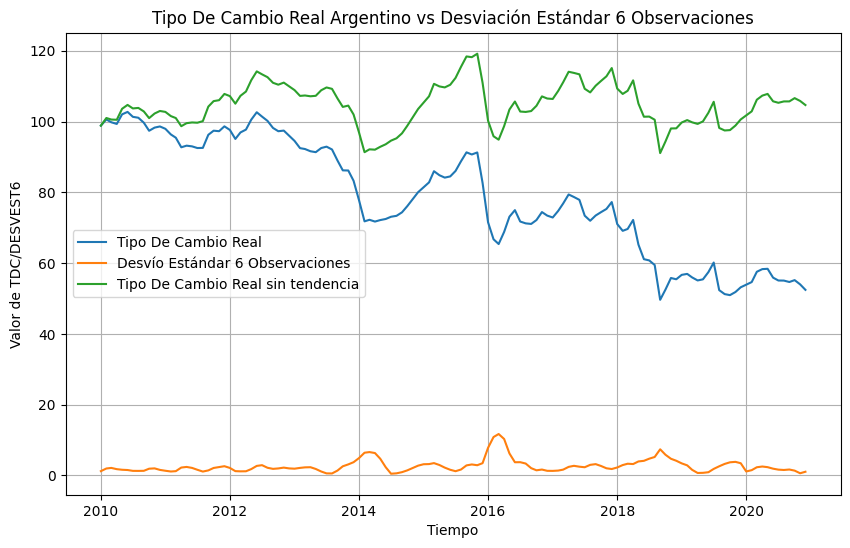

In [ ]:
# Defino eje X y series a graficar
eje_x = df['t']
serie_tdc = df['RBER_AR']
serie_desvest_tdc = df['RBER_AR_sd6']
serie_tdc_dt = df['RBER_AR_DETREND']

# Grafico las series en función del tiempo
plt.figure(figsize = (10, 6))
plt.plot(eje_x , serie_tdc, label = 'Tipo De Cambio Real')
plt.plot(eje_x , serie_desvest_tdc, label = 'Desvío Estándar 6 Observaciones')
plt.plot(eje_x , serie_tdc_dt, label = 'Tipo De Cambio Real sin tendencia')
plt.title('Tipo De Cambio Real Argentino vs Desviación Estándar 6 Observaciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor de TDC/DESVEST6')
plt.grid(True)
plt.legend()
plt.show()

Como vemos en el gráfico, eliminamos la tendencia de la serie.

In [ ]:
#Verifico que no tenga NAN y sea numerico
tc_real_dt = pd.to_numeric(df['RBER_AR_DETREND'], errors='coerce').dropna()
tc_real_dt.head(), tc_real_dt.shape

(0     98.870003
 1    101.026103
 2    100.592900
 3    100.528998
 4    103.631998
 Name: RBER_AR_DETREND, dtype: float64,
 (132,))

In [ ]:
#ADF en niveles

res0 = adfuller(tc_real_dt, regression='c', autolag='AIC')
print(f"ADF nivel (c): stat={res0[0]:.3f}, p={res0[1]:.4f}, lags={res0[2]}, nobs={res0[3]}")
for k, v in res0[4].items():
    print(f"crit {k}: {v:.3f}")

ADF nivel (c): stat=-3.716, p=0.0039, lags=1, nobs=130
crit 1%: -3.482
crit 5%: -2.884
crit 10%: -2.579


Volví a correr el ADF, para chequear que efectivamente mi variable sin la tendencia sea I(0), y como el pvalor es 0.0039 a nivel 5% puedo rechazar la hipótesis nula y concluyo que la serie es estacionaria

Siendo ambas series I(0), procedo a estimar el modelo VAR.

In [ ]:
# DF para resolver este ejercicio
df_var = df[['RBER_AR_DETREND', 'RBER_AR_sd6']].dropna()  # por si quedó algún NaN

# Selección de orden máximo (12 ya que es una serie mensual, y tomo 2 años)
modelo_var = VAR(df_var)
sel = modelo_var.select_order(maxlags=24)

# Vemos todos los criterios
print(sel.summary())

# Elegimos el orden por BIC (más parsimonioso en general)
p = sel.selected_orders['bic']
print("Orden óptimo por BIC:", p)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.904       4.954       134.8       4.924
1        1.715       1.864       5.558       1.776
2       1.080*      1.328*      2.944*      1.180*
3        1.095       1.443       2.991       1.236
4        1.141       1.588       3.133       1.322
5        1.206       1.753       3.346       1.428
6        1.202       1.848       3.334       1.464
7        1.163       1.908       3.212       1.465
8        1.202       2.047       3.345       1.545
9        1.182       2.125       3.284       1.564
10       1.214       2.257       3.401       1.637
11       1.243       2.386       3.513       1.706
12       1.142       2.384       3.187       1.645
13       1.191       2.532       3.361       1.734
14       1.250       2.690       3.586       1.834
15       1.321       2.861       3.873       1.945
16       1.357       2.996     

Todos los métodos de selección apuntan a usar 2 lags, por lo que estimo un VAR(2)

In [ ]:
# Estimamos el VAR con p = 2
res = modelo_var.fit(p)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Aug, 2025
Time:                     22:55:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.05051
Nobs:                     130.000    HQIC:                  0.919557
Log likelihood:          -412.869    FPE:                    2.29333
AIC:                     0.829928    Det(Omega_mle):         2.12660
--------------------------------------------------------------------
Results for equation RBER_AR_DETREND
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     14.690186         4.184914            3.510           0.000
L1.RBER_AR_DETREND         1.248059         0.093695           13.320           0.000
L1.RBER_AR_sd6            -0.0

In [ ]:
# Chequeo la estabilidad del VAR
print("VAR estable?:", res.is_stable())

# Si quiero ver las raíces
print("Raíces del polinomio característico (|root| <1 para estabilidad):")
print(np.abs(res.roots))

VAR estable?: True
Raíces del polinomio característico (|root| <1 para estabilidad):
[1.63832693 1.63832693 1.35371937 1.35371937]


In [ ]:
granger_test = res.test_causality('RBER_AR_DETREND', ['RBER_AR_sd6'], kind='f')
print(granger_test.summary())

# También podés acceder directo al p-value
pval = granger_test.pvalue
print(f"\nP-value = {pval:.4f}")

# Interpretación al 10%
if pval < 0.10:
    print("→ Rechazo H0:  causa en sentido de Granger.")
else:
    print("→ No rechazo H0: no hay evidencia de causalidad en sentido de Granger")

Granger causality F-test. H_0: RBER_AR_sd6 does not Granger-cause RBER_AR_DETREND. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value         df        
--------------------------------------------------------
        0.1280          3.032   0.880 (2, np.int64(250))
--------------------------------------------------------

P-value = 0.8799
→ No rechazo H0: no hay evidencia de causalidad en sentido de Granger


In [ ]:
granger_test = res.test_causality('RBER_AR_sd6', ['RBER_AR_DETREND'], kind='f')
print(granger_test.summary())

# También podés acceder directo al p-value
pval = granger_test.pvalue
print(f"\nP-value = {pval:.4f}")

# Interpretación al 10%
if pval < 0.10:
    print("→ Rechazo H0:  causa en sentido de Granger.")
else:
    print("→ No rechazo H0: no hay evidencia de causalidad en sentido de Granger")

Granger causality F-test. H_0: RBER_AR_DETREND does not Granger-cause RBER_AR_sd6. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value         df        
--------------------------------------------------------
         5.103          3.032   0.007 (2, np.int64(250))
--------------------------------------------------------

P-value = 0.0067
→ Rechazo H0:  causa en sentido de Granger.


Como vemos, tenemos evidencia de que el tipo de cambio real (una vez que se le saca la tendencia determíistica), causa en sentido de granger al desvío estandar del tipo de cambio real.

#Ejercicio 3

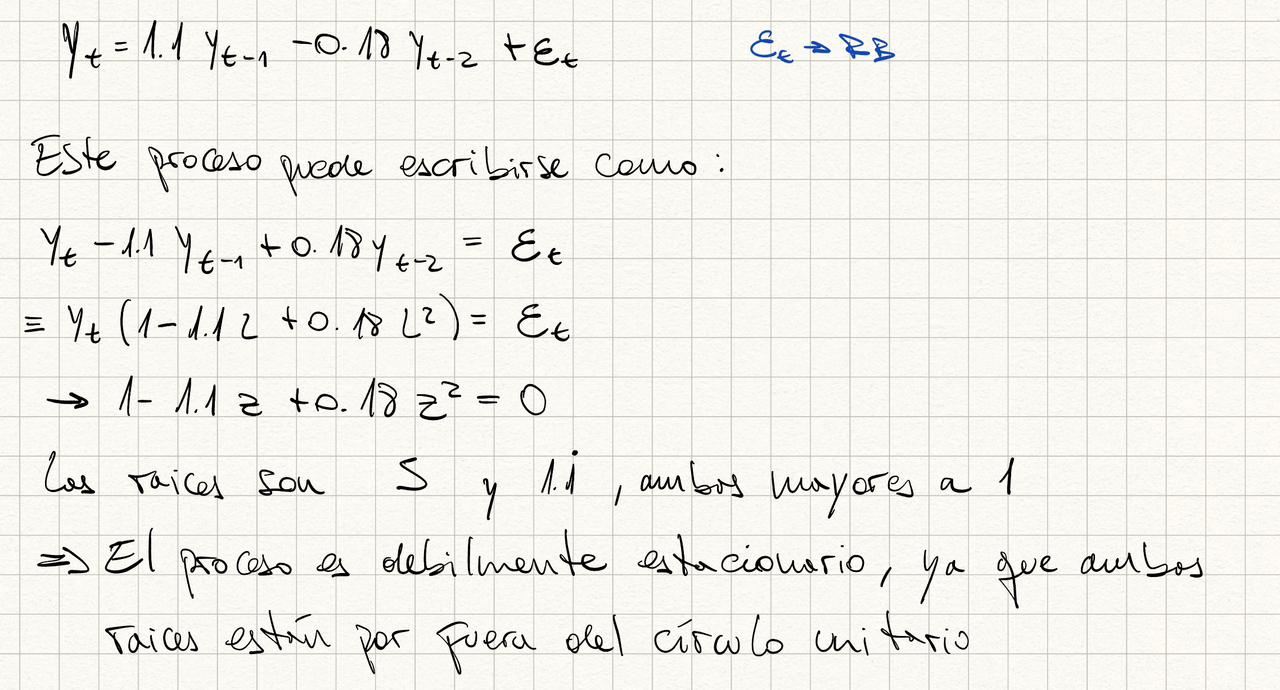

#Ejercicio 4

In [ ]:
ruta = '/content/drive/MyDrive/Precios_y_Dinero.xlsx'
df = pd.read_excel(ruta)
df.head()

,MMYY,IPC,M,M_en_ARS
0,2003-01-01,100.000000,100.000000,29609.920333
1,2003-02-01,100.566796,99.359830,29420.366429
2,2003-03-01,101.155116,102.628052,30388.084290
3,2003-04-01,101.212513,104.258927,30870.985333
4,2003-05-01,100.817908,111.804321,33105.170323


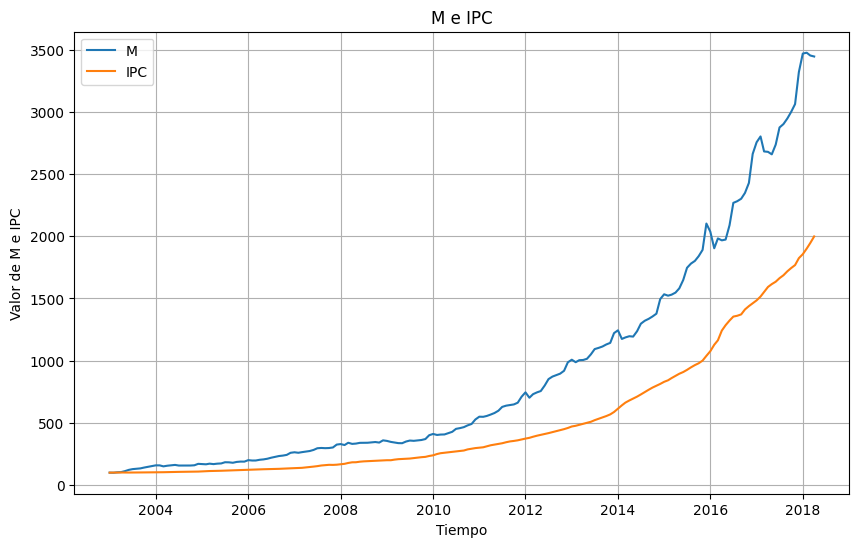

In [ ]:
# Asegurar que sea datetime
df['MMYY'] = pd.to_datetime(df['MMYY'])

df.columns = df.columns.str.strip() #Para sacarle espacios a los nombres de las variables

# Defino eje X y series a graficar
eje_x = df['MMYY']
serie_m = df['M']
serie_ipc = df['IPC']

# Grafico las series en función del tiempo
plt.figure(figsize = (10, 6))
plt.plot(eje_x , serie_m, label = 'M')
plt.plot(eje_x , serie_ipc, label = 'IPC')
plt.title('M e IPC')
plt.xlabel('Tiempo')
plt.ylabel('Valor de M e IPC')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Generamos las series de inflacion y crecimiento monetario tomando la diferencia logaritmica, y multiplicando por 100

df['inflacion'] = 100 * np.log(df['IPC']).diff()
df['crec_m']    = 100 * np.log(df['M']).diff()

#Ambas son I(0), lo verifico en la práctica 6

In [ ]:
# DF para resolver este ejercicio
df_var = df[['inflacion', 'crec_m']].dropna()  # por si quedó algún NaN

# Selección de orden máximo (24 ya que es una serie mensual, tomo 2 años)
modelo_var = VAR(df_var)
sel = modelo_var.select_order(maxlags=24)

# Vemos todos los criterios
print(sel.summary())

# Elegimos el orden por BIC (más parsimonioso en general)
p = sel.selected_orders['bic']
print("Orden óptimo por BIC:", p)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        2.021       2.060       7.545       2.037
1        1.600      1.715*       4.951       1.647
2        1.540       1.734       4.667      1.619*
3        1.514       1.785       4.547       1.624
4        1.504       1.852       4.502       1.645
5        1.520       1.945       4.574       1.692
6        1.522       2.024       4.585       1.726
7        1.494       2.073       4.459       1.729
8        1.504       2.160       4.508       1.771
9        1.539       2.272       4.669       1.837
10       1.465       2.275       4.340       1.794
11       1.464       2.352       4.340       1.824
12       1.330       2.295       3.800       1.722
13      1.295*       2.337      3.675*       1.718
14       1.340       2.460       3.851       1.795
15       1.365       2.562       3.955       1.851
16       1.373       2.647     

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Estimamos el VAR con p = 1
res = modelo_var.fit(p)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Aug, 2025
Time:                     22:55:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.66674
Nobs:                     182.000    HQIC:                   1.60393
Log likelihood:          -652.555    FPE:                    4.76413
AIC:                      1.56111    Det(Omega_mle):         4.61087
--------------------------------------------------------------------
Results for equation inflacion
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.531794         0.114553            4.642           0.000
L1.inflacion         0.674440         0.055254           12.206           0.000
L1.crec_m            0.005560         0.019907            0.

Estabilidad del VAR (chequeo que no haya raices unitarias)

In [ ]:
# Chequeo la estabilidad del VAR
print("VAR estable?:", res.is_stable())

# Si quiero ver las raíces
print("Raíces del polinomio característico (|root| <1 para estabilidad):")
print(np.abs(res.roots))

VAR estable?: True
Raíces del polinomio característico (|root| <1 para estabilidad):
[9.22805456 1.49354918]


In [ ]:
# Test de Granger: H0 = crec_m NO causa en sentido de Granger a inflacion
granger_test = res.test_causality('inflacion', ['crec_m'], kind='f')
print(granger_test.summary())

# También podés acceder directo al p-value
pval = granger_test.pvalue
print(f"\nP-value = {pval:.4f}")

# Interpretación al 10%
if pval < 0.10:
    print("→ Rechazo H0: crec_m causa en sentido de Granger a inflacion.")
else:
    print("→ No rechazo H0: no hay evidencia de causalidad de Granger de crec_m a inflacion.")

Granger causality F-test. H_0: crec_m does not Granger-cause inflacion. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value         df        
--------------------------------------------------------
       0.07801          3.868   0.780 (1, np.int64(358))
--------------------------------------------------------

P-value = 0.7802
→ No rechazo H0: no hay evidencia de causalidad de Granger de crec_m a inflacion.


Tomando un solo rezago, no hay evidencia de causalidad en sentido de granger, de que el crecimiento monetario cause la inflación, por lo que vamos a probar con más rezagos utilizando otro criterio de selección.

In [ ]:
modelo_var = VAR(df_var)
sel = modelo_var.select_order(maxlags=24)

# Vemos todos los criterios
print(sel.summary())

# Elegimos el orden por AIC (más parsimonioso en general)
p = sel.selected_orders['aic']
print("Orden óptimo por aic:", p)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        2.021       2.060       7.545       2.037
1        1.600      1.715*       4.951       1.647
2        1.540       1.734       4.667      1.619*
3        1.514       1.785       4.547       1.624
4        1.504       1.852       4.502       1.645
5        1.520       1.945       4.574       1.692
6        1.522       2.024       4.585       1.726
7        1.494       2.073       4.459       1.729
8        1.504       2.160       4.508       1.771
9        1.539       2.272       4.669       1.837
10       1.465       2.275       4.340       1.794
11       1.464       2.352       4.340       1.824
12       1.330       2.295       3.800       1.722
13      1.295*       2.337      3.675*       1.718
14       1.340       2.460       3.851       1.795
15       1.365       2.562       3.955       1.851
16       1.373       2.647     

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Estimamos el VAR con p = 13
res_13 = modelo_var.fit(13)
print(res_13.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Aug, 2025
Time:                     22:55:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.32059
Nobs:                     170.000    HQIC:                   1.72871
Log likelihood:          -541.023    FPE:                    3.78080
AIC:                      1.32451    Det(Omega_mle):         2.81546
--------------------------------------------------------------------
Results for equation inflacion
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.290971         0.197417            1.474           0.141
L1.inflacion          0.498100         0.082998            6.001           0.000
L1.crec_m             0.008050         0.026944         

In [ ]:
# Chequeo la estabilidad del VAR
print("VAR estable?:", res_13.is_stable())

# Si quiero ver las raíces
print("Raíces del polinomio característico (|root| <1 para estabilidad):")
print(np.abs(res_13.roots))

VAR estable?: True
Raíces del polinomio característico (|root| <1 para estabilidad):
[166.01477658   1.39335972   1.39335972   1.23252697   1.23252697
   1.15317868   1.15317868   1.14528167   1.14512418   1.14512418
   1.14223989   1.11727704   1.11727704   1.10367455   1.10367455
   1.10312629   1.10312629   1.08686377   1.06255928   1.06255928
   1.05972649   1.05972649   1.05161915   1.05161915   1.01652392
   1.01652392]


In [ ]:
# Test de Granger: H0 = crec_m NO causa en sentido de Granger a inflacion
granger_test = res_13.test_causality('inflacion', ['crec_m'], kind='f')
print(granger_test.summary())

# También podés acceder directo al p-value
pval = granger_test.pvalue
print(f"\nP-value = {pval:.4f}")

# Interpretación al 10%
if pval < 0.10:
    print("→ Rechazo H0: crec_m causa en sentido de Granger a inflacion.")
else:
    print("→ No rechazo H0: no hay evidencia de causalidad de Granger de crec_m a inflacion.")

Granger causality F-test. H_0: crec_m does not Granger-cause inflacion. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         1.770          1.754   0.047 (13, 286)
-----------------------------------------------

P-value = 0.0474
→ Rechazo H0: crec_m causa en sentido de Granger a inflacion.


Tomando 13 rezagos, podemos concluir que el crecimiento monetario causa en sentido de granger a la inflación